In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.383641,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.513239,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.539893,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.443220,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3803,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3804,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3805,ZWILCH,0.000030,0.775549,1.843545,0.101584,1.843545
3806,ZWINT,0.001874,0.854401,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:MF'])

In [25]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [26]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [27]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [28]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
0,GO:MF,GO:0003824,catalytic activity,3.665954e-36,True,"""Catalysis of a biochemical reaction at physio...",4198,3746,1484,13575,0.396156,0.353502,query_1,[GO:0003674],"[AAK1, AARS2, AASDHPPT, AASS, ABAT, ABCA3, ABC...","[[ISS, IBA, TAS], [IMP, IBA], [IDA, IBA, TAS],...",perm_unranked
1,GO:MF,GO:0003674,molecular_function,2.048848e-18,True,"""A molecular process that can be carried out b...",12533,3746,3588,13575,0.957822,0.286284,query_1,[],"[AAAS, AAGAB, AAK1, AAMP, AARS2, AASDHPPT, AAS...","[[IPI, ND], [IPI], [IDA, IPI, ISS, IBA, TAS], ...",perm_unranked
2,GO:MF,GO:0003723,RNA binding,3.544216e-17,True,"""Interacting selectively and non-covalently wi...",1383,3746,537,13575,0.143353,0.388286,query_1,[GO:0003676],"[AARS2, ABCF1, ACAA2, ACTN1, ADAR, ADAT1, AGFG...","[[IBA], [HDA, TAS], [HDA], [IDA], [HDA, IBA], ...",perm_unranked
3,GO:MF,GO:0042802,identical protein binding,7.848591e-15,True,"""Interacting selectively and non-covalently wi...",1589,3746,593,13575,0.158302,0.373191,query_1,[GO:0005515],"[ABAT, ABCD3, ACACA, ACADM, ACADSB, ACADVL, AC...","[[IPI], [IDA], [IPI], [IDA], [IDA], [IDA], [IP...",perm_unranked
4,GO:MF,GO:0005515,protein binding,1.093152e-13,True,"""Interacting selectively and non-covalently wi...",10684,3746,3130,13575,0.835558,0.292961,query_1,[GO:0005488],"[AAAS, AAGAB, AAK1, AAMP, AARS2, AASDHPPT, AAS...","[[IPI], [IPI], [IDA, IPI], [IPI], [IPI], [IPI]...",perm_unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GO:MF,GO:0045296,cadherin binding,2.293466e-07,True,"""Interacting selectively and non-covalently wi...",305,1182,69,13575,0.058376,0.226230,query_1,[GO:0050839],"[FLNB, PAICS, BAIAP2L1, EMD, SLK, LAD1, EZR, A...","[[HDA], [HDA], [HDA], [HDA], [HDA], [HDA], [HD...",regression_upregulated
1,GO:MF,GO:0050839,cell adhesion molecule binding,3.710741e-06,True,"""Interacting selectively and non-covalently wi...",466,1235,94,13575,0.076113,0.201717,query_1,[GO:0005515],"[FLNB, PAICS, BAIAP2L1, EMD, SLK, LAD1, EZR, A...","[[HDA], [HDA], [HDA], [HDA], [HDA], [HDA], [IP...",regression_upregulated
2,GO:MF,GO:0008168,methyltransferase activity,2.662011e-03,True,"""Catalysis of the transfer of a methyl group t...",157,168,14,13575,0.083333,0.089172,query_1,[GO:0016741],"[PRMT3, TFB2M, TFB1M, PRMT6, DPH5, NDUFAF7, TR...","[[IDA, TAS, NAS], [IBA], [EXP, IBA], [EXP, IDA...",regression_upregulated
3,GO:MF,GO:0008757,S-adenosylmethionine-dependent methyltransfera...,3.639265e-03,True,"""Catalysis of the transfer of a methyl group f...",137,168,13,13575,0.077381,0.094891,query_1,[GO:0008168],"[PRMT3, TFB2M, TFB1M, PRMT6, DPH5, NDUFAF7, TR...","[[TAS, NAS], [IBA], [EXP, IBA], [EXP, IDA, TAS...",regression_upregulated


In [29]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

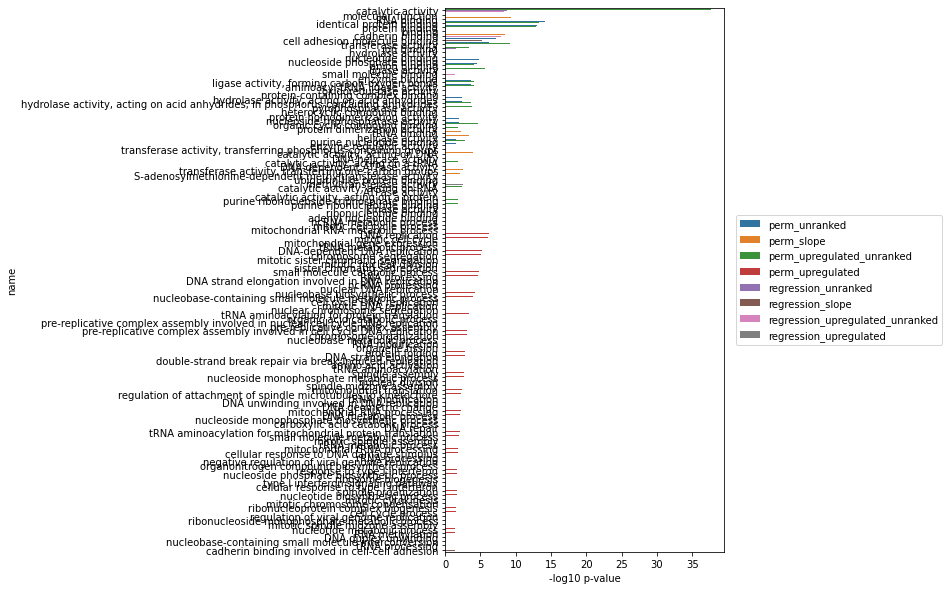

In [30]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [31]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [32]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
4,"{regression_upregulated_unranked, regression_unranked, regression_upregulated, perm_upregulated_unranked, perm_unranked, regression_slope, perm_slope}","{cadherin binding, cell adhesion molecule binding}",0.875
0,"{regression_unranked, perm_upregulated_unranked, regression_upregulated_unranked, perm_unranked}","{identical protein binding, catalytic activity, ion binding}",0.500
2,"{perm_upregulated_unranked, perm_slope, regression_upregulated_unranked, perm_unranked}",{RNA binding},0.500
10,"{regression_upregulated, perm_upregulated_unranked, regression_slope, perm_slope}","{transferase activity, transferring one-carbon groups}",0.500
1,"{regression_unranked, perm_upregulated_unranked, perm_unranked}",{molecular_function},0.375
5,"{perm_upregulated_unranked, regression_upregulated_unranked, perm_unranked}","{nucleoside phosphate binding, nucleotide binding, small molecule binding}",0.375
6,"{perm_upregulated_unranked, perm_slope, perm_unranked}","{ligase activity, forming carbon-oxygen bonds, helicase activity, aminoacyl-tRNA ligase activity, tRNA binding}",0.375
11,"{regression_upregulated, regression_slope, perm_slope}","{methyltransferase activity, S-adenosylmethionine-dependent methyltransferase activity}",0.375
3,"{perm_upregulated_unranked, perm_unranked}","{pyrophosphatase activity, purine nucleotide binding, enzyme binding, transferase activity, protein dimerization activity, organic cyclic compound binding, hydrolase activity, protein binding, ligase activity, heterocyclic compound binding, hydrolase activity, acting on acid anhydrides, protein homodimerization activity, transferase activity, transferring phosphorus-containing groups, hydrolase activity, acting on acid anhydrides, in phosphorus-containing anhydrides, binding, anion binding, nucleoside-triphosphatase activity}",0.250
9,"{perm_upregulated_unranked, perm_slope}","{catalytic activity, acting on a tRNA, catalytic activity, acting on RNA}",0.250


In [34]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,cadherin binding,0.875
1,cell adhesion molecule binding,0.875
2,identical protein binding,0.500
3,catalytic activity,0.500
4,ion binding,0.500
...,...,...
124,nuclear division,0.125
125,chromosome organization,0.125
126,nucleotide biosynthetic process,0.125
127,cell cycle process,0.125


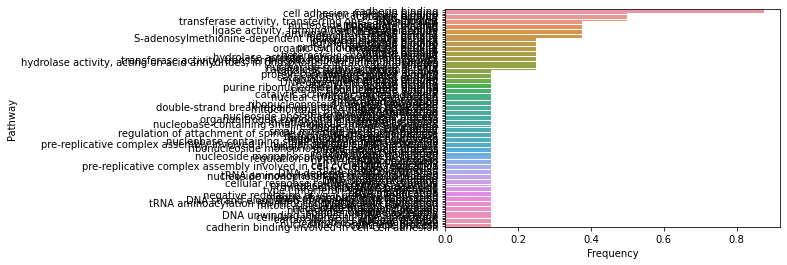

In [35]:
axes = sns.barplot(data = upregulated_pathways_df, y = 'Pathway', x = 'Frequency')


In [36]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [37]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
3,"{regression_unranked, regression_slope, perm_slope, perm_unranked}","{cadherin binding, cell adhesion molecule binding}",0.666667
0,"{regression_unranked, perm_unranked}","{molecular_function, identical protein binding, catalytic activity, ion binding}",0.333333
1,"{perm_slope, perm_unranked}","{ligase activity, forming carbon-oxygen bonds, RNA binding, helicase activity, tRNA binding, aminoacyl-tRNA ligase activity}",0.333333
5,"{regression_slope, perm_slope}","{methyltransferase activity, transferase activity, transferring one-carbon groups, S-adenosylmethionine-dependent methyltransferase activity}",0.333333
6,"{perm_downregulated_unranked, perm_downregulated}",{actin binding},0.333333
2,{perm_unranked},"{purine nucleotide binding, oxidoreductase activity, small molecule binding, pyrophosphatase activity, anion binding, nucleoside phosphate binding, protein binding, hydrolase activity, acting on acid anhydrides, nucleotide binding, nucleoside-triphosphatase activity, enzyme binding, hydrolase activity, heterocyclic compound binding, transferase activity, transferring phosphorus-containing groups, protein-containing complex binding, protein homodimerization activity, binding, transferase activity, protein dimerization activity, enzyme regulator activity, organic cyclic compound binding, ligase activity, hydrolase activity, acting on acid anhydrides, in phosphorus-containing anhydrides}",0.166667
4,{perm_slope},"{catalytic activity, acting on DNA, ubiquitin-like protein binding, DNA helicase activity, DNA-dependent ATPase activity, catalytic activity, acting on RNA, catalytic activity, acting on a tRNA}",0.166667
7,{regression_slope},{cadherin binding involved in cell-cell adhesion},0.166667
